In [1]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

# raw keras
from livelossplot.keras import PlotLossesCallback

# tensorflow.keras
# from livelossplot.tf_keras import PlotLossesCallback

Using TensorFlow backend.


In [2]:
# data loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [4]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',  # 'mean_squared_error'
              metrics=['accuracy', 'mean_squared_error'])

In [5]:
batch_size = 6000
plot_losses = PlotLossesCallback()

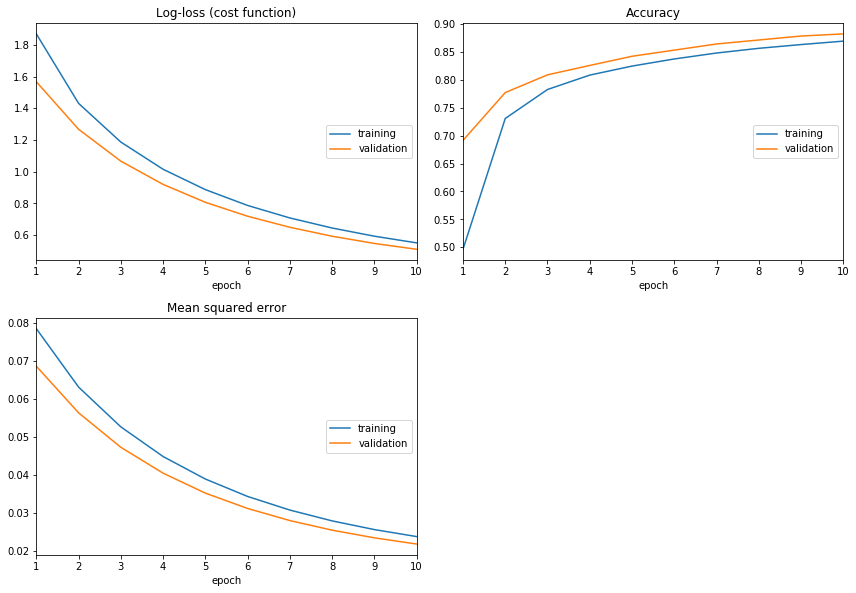

Log-loss (cost function):
training   (min:    0.523, max:    2.272, cur:    0.551)
validation (min:    0.511, max:    1.568, cur:    0.511)

Accuracy:
training   (min:    0.192, max:    0.878, cur:    0.869)
validation (min:    0.691, max:    0.882, cur:    0.882)

Mean squared error:
training   (min:    0.023, max:    0.089, cur:    0.024)
validation (min:    0.022, max:    0.069, cur:    0.022)


In [6]:
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=0)

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',  # 'mean_squared_error'
              metrics=['accuracy', 'mean_squared_error'])

samples_per_update = 30000

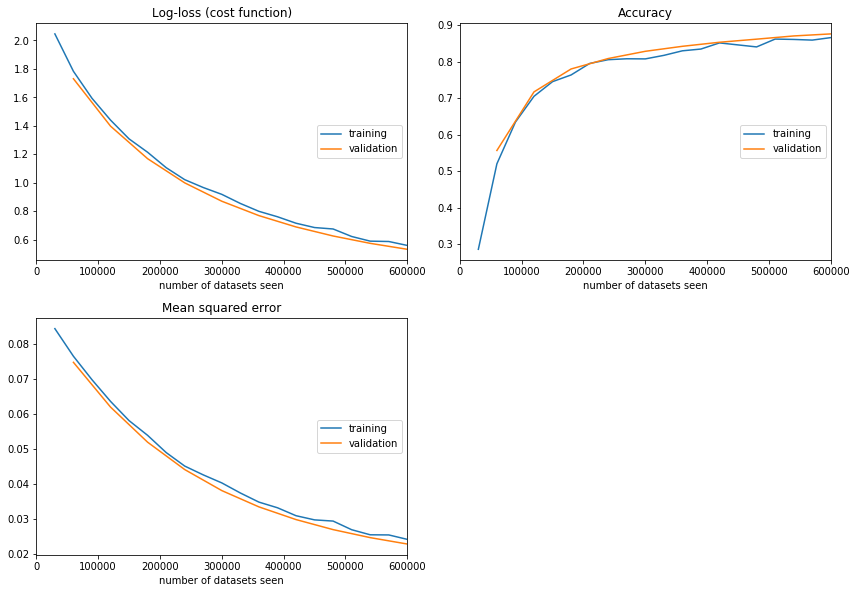

Log-loss (cost function):
training   (min:    0.561, max:    2.500, cur:    0.561)
validation (min:    0.533, max:    1.731, cur:    0.533)

Accuracy:
training   (min:    0.060, max:    0.866, cur:    0.866)
validation (min:    0.556, max:    0.876, cur:    0.876)

Mean squared error:
training   (min:    0.024, max:    0.094, cur:    0.024)
validation (min:    0.023, max:    0.075, cur:    0.023)


In [8]:
plot_losses = PlotLossesCallback(samples_per_update = samples_per_update, training_size = len(X_train))
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=0)